# Titanic EDA + Prediction

### Data Descriptions

* Survival : 0 = No, 1 = Yes
* pclass(Ticket Class) : 1 = 1st, 2 = 2nd, 3 = 3rd
* Sex(Gender) : Male, Female
* Age : Age in years
* SibSp : Number of siblings/spouses abroad the titanic
* Parch : Number of parents/children abrod the titanic
* Ticket : Ticket Number
* Fare : Passenger fare
* Cabin : Cabin Number
* Embarked : Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set()
%matplotlib inline

In [2]:
train_df = pd.read_csv("titanic_train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train_df.var()

PassengerId    66231.000000
Survived           0.236772
Pclass             0.699015
Age              211.019125
SibSp              1.216043
Parch              0.649728
Fare            2469.436846
dtype: float64

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Checking for null values

In [6]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Installing missingo 
#pip install missingno requests pandas

### Exploratory Data Analysis (EDA)

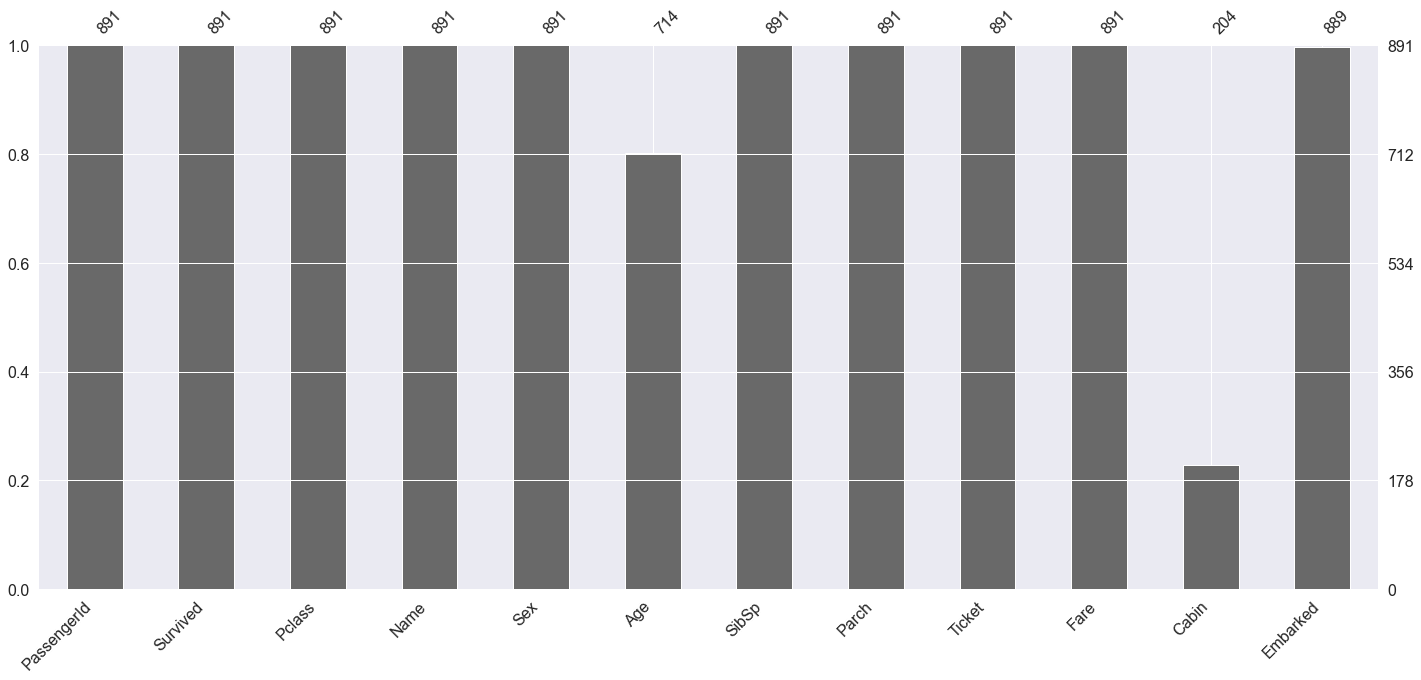

In [9]:
# visualizing null values

import missingno as msno

msno.bar(train_df)
plt.show()

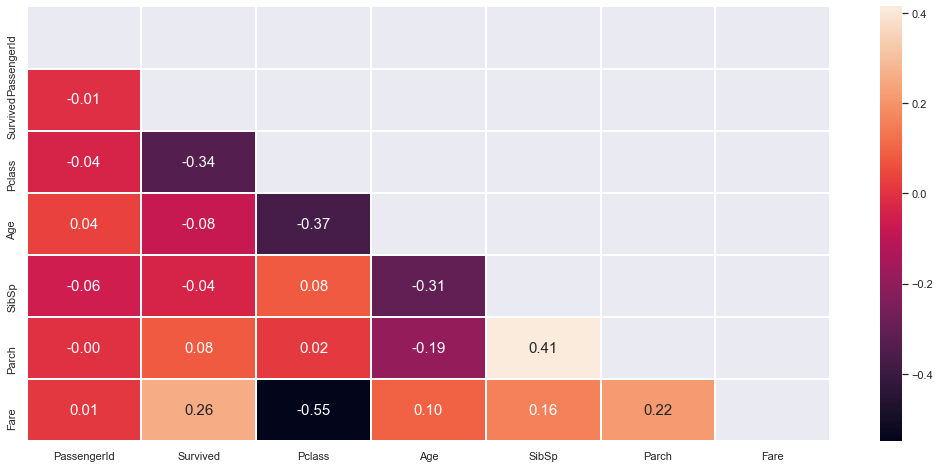

In [10]:
# heatmap

plt.figure(figsize = (18, 8))

corr = train_df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, annot = True, fmt = '.2f', linewidths = 1, annot_kws = {'size' : 15})
plt.show()

##### Heatmap is not useful in case of categorical variables, so we will analyse each column to check how each column is contributing in prediction.

### Survived Column

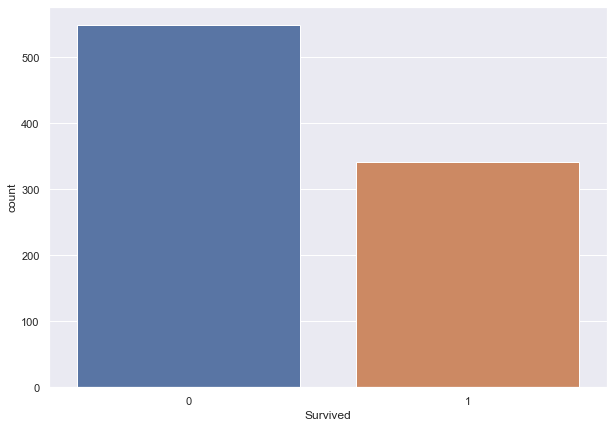

In [11]:
plt.figure(figsize = (10, 7))

sns.countplot('Survived', data = train_df)
plt.show()

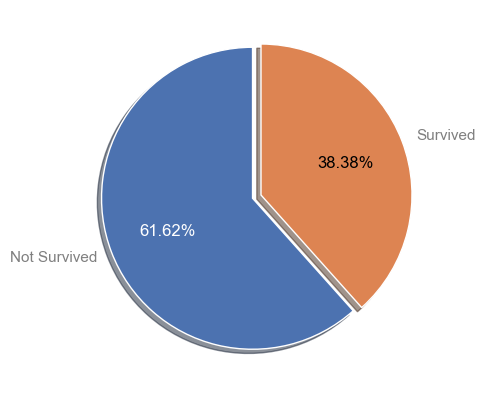

In [12]:
values = train_df['Survived'].value_counts()
labels = ['Not Survived', 'Survived']

fig, ax = plt.subplots(figsize = (5, 5), dpi = 100)
explode = (0, 0.06)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 12, color = 'white')
autotexts[1].set_color('black')
plt.show()


#### PClass Column

In [13]:
train_df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [14]:
train_df.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

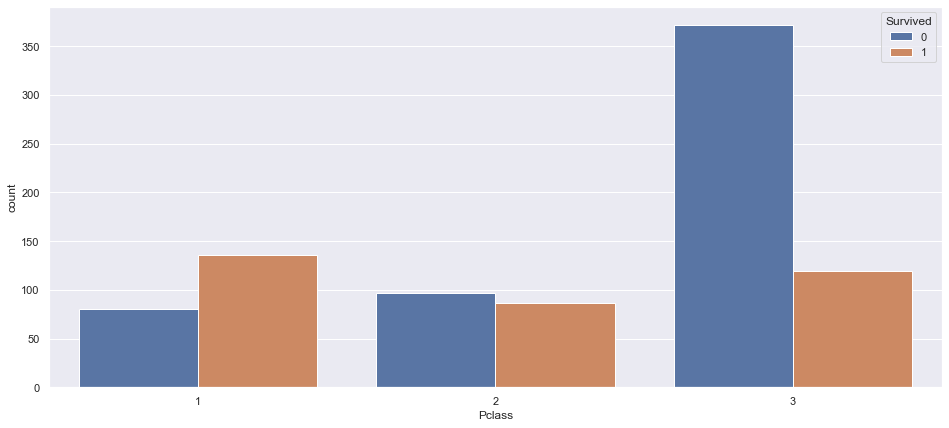

In [15]:
plt.figure(figsize = (16, 7))

sns.countplot('Pclass', hue = 'Survived', data = train_df)
plt.show()

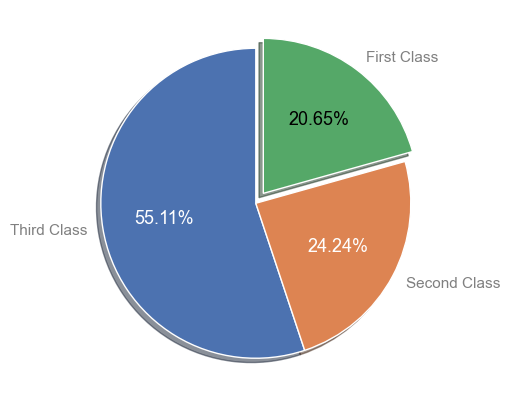

In [16]:
values = train_df['Pclass'].value_counts()
labels = ['Third Class', 'Second Class', 'First Class']
explode = (0, 0, 0.08)

fig, ax = plt.subplots(figsize = (5, 6), dpi = 100)
patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 13, color = 'white')
autotexts[2].set_color('black')
plt.show()

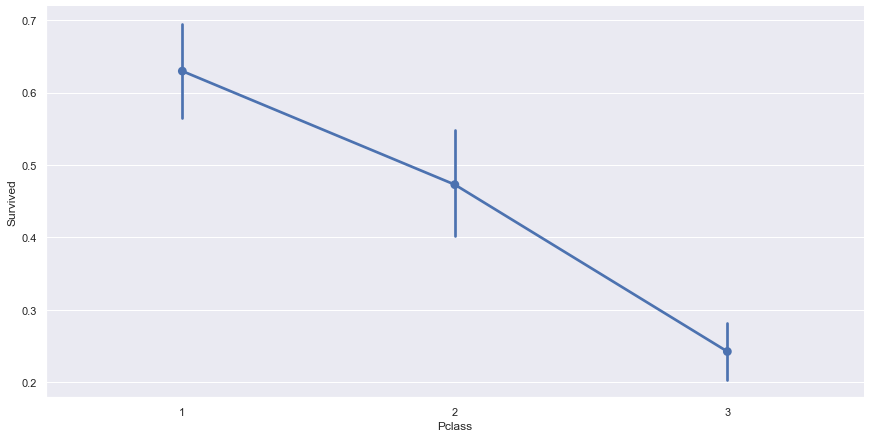

In [17]:
sns.catplot('Pclass', 'Survived', kind = 'point', data = train_df, height = 6, aspect = 2)
plt.show()

#### Name Column

In [18]:
train_df.Name.value_counts()

Moran, Mr. Daniel J                       1
Lindqvist, Mr. Eino William               1
Panula, Mrs. Juha (Maria Emilia Ojala)    1
Boulos, Mr. Hanna                         1
Jardin, Mr. Jose Neto                     1
                                         ..
Moran, Mr. James                          1
Madigan, Miss. Margaret "Maggie"          1
Gill, Mr. John William                    1
Sage, Miss. Stella Anna                   1
McCoy, Miss. Agnes                        1
Name: Name, Length: 891, dtype: int64

In [19]:
len(train_df.Name.unique()), train_df.shape

(891, (891, 12))

#### Sex Column

In [20]:
train_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [21]:
train_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

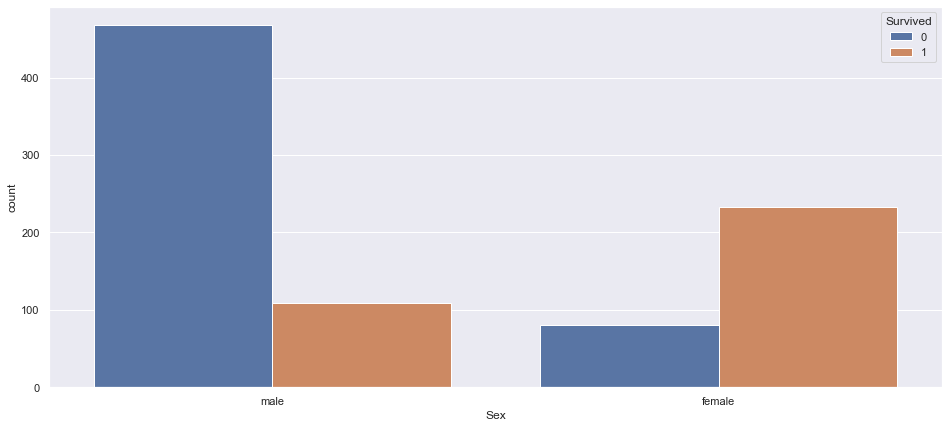

In [22]:
plt.figure(figsize = (16, 7))

sns.countplot('Sex', hue = 'Survived', data = train_df)
plt.show()

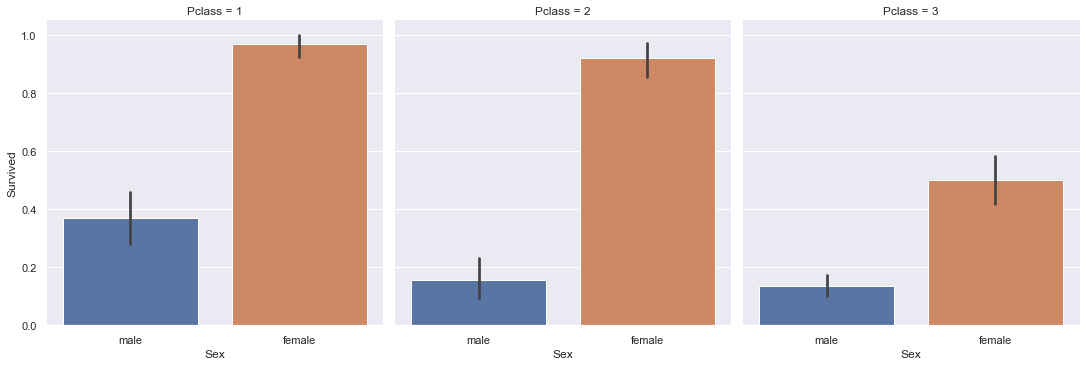

In [23]:
sns.catplot(x = 'Sex', y = 'Survived', data = train_df, kind = 'bar', col = 'Pclass')
plt.show()

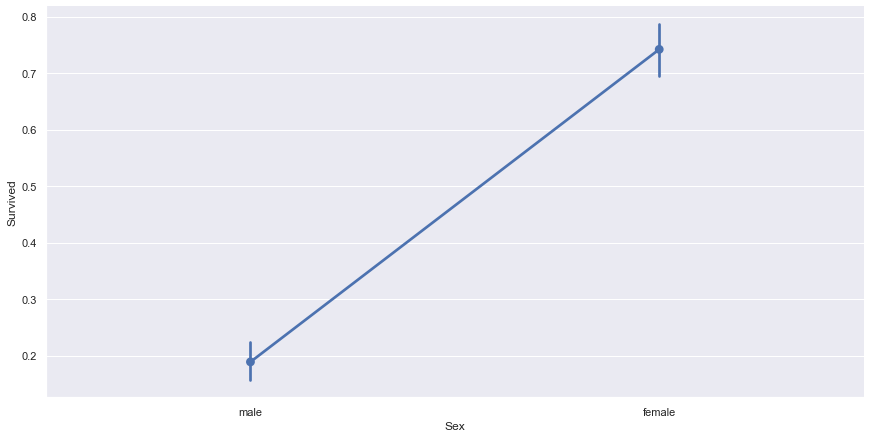

In [24]:
sns.catplot(x = 'Sex', y = 'Survived', data = train_df, kind = 'point', height = 6, aspect =2)
plt.show()

<Figure size 1080x432 with 0 Axes>

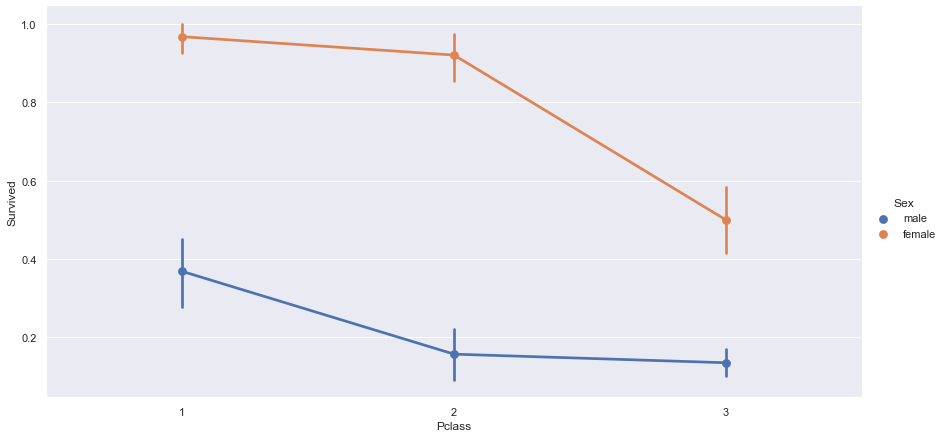

In [25]:
plt.figure(figsize = (15, 6))

sns.catplot(x = 'Pclass', y = 'Survived', kind = 'point', data = train_df, hue = 'Sex', height = 6, aspect = 2)
plt.show()

#### Age Column

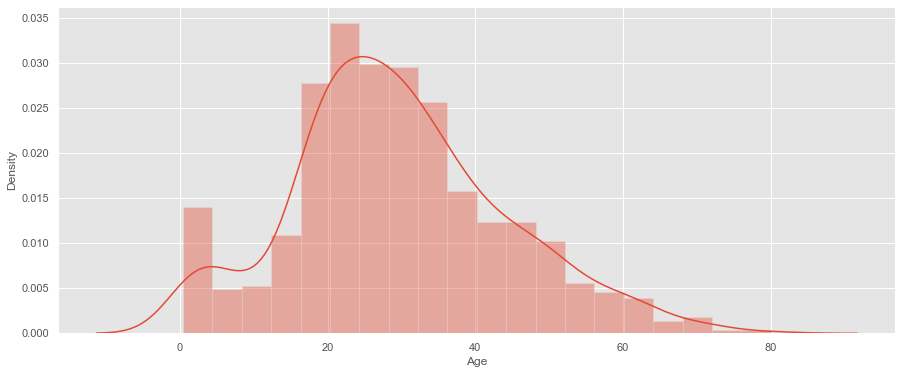

In [26]:
plt.figure(figsize = (15, 6))
plt.style.use('ggplot')

sns.distplot(train_df['Age'])
plt.show()

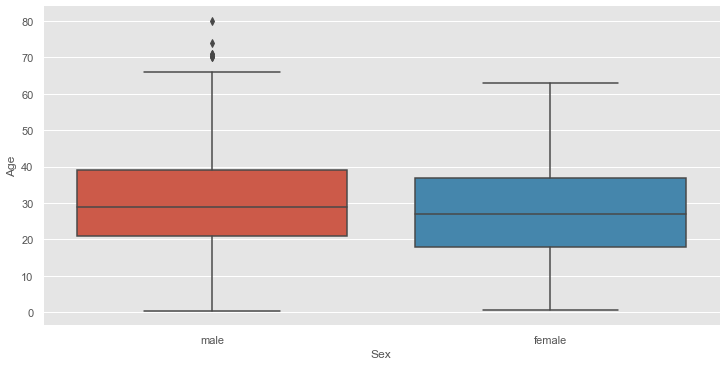

In [27]:
sns.catplot(x = 'Sex', y = 'Age', kind = 'box', data = train_df, height = 5, aspect = 2)
plt.show()

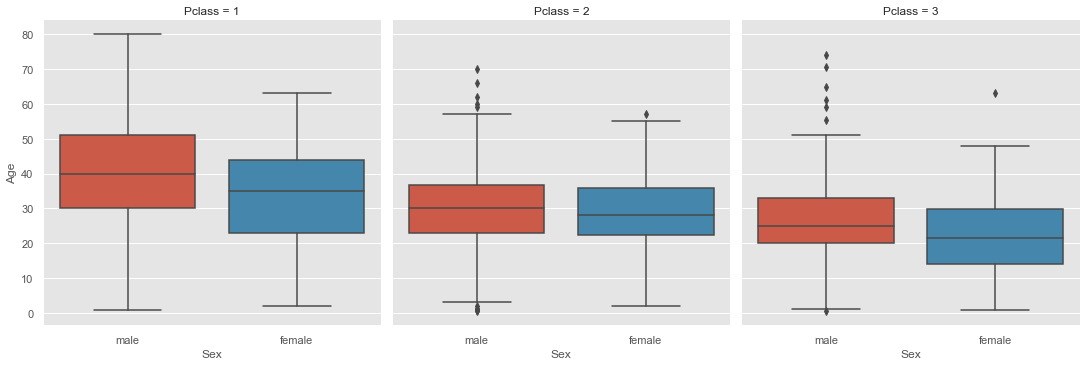

In [28]:
sns.catplot(x = 'Sex', y = 'Age', kind = 'box', data = train_df, col = 'Pclass')
plt.show()

#### Fare Column

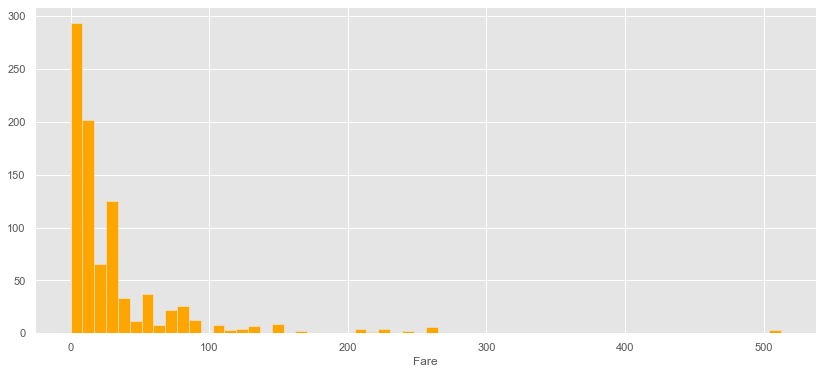

In [29]:
plt.figure(figsize = (14, 6))

plt.hist(train_df.Fare, bins = 60, color = 'orange')
plt.xlabel('Fare')
plt.show()

##### We can see that lot of zero values are there in Fare column so we will replace zero values with mean value of Fare column.

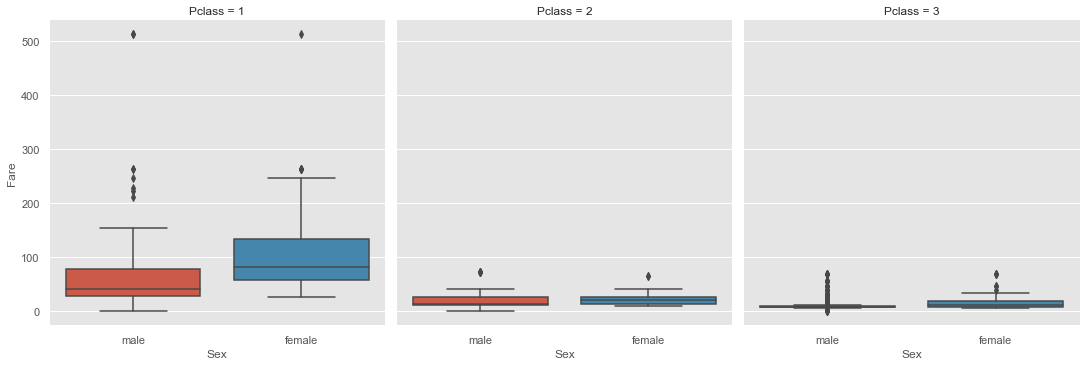

In [30]:
sns.catplot(x = 'Sex', y = 'Fare', data = train_df, kind = 'box', col = 'Pclass')
plt.show()

#### SibSp Column

In [31]:
train_df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

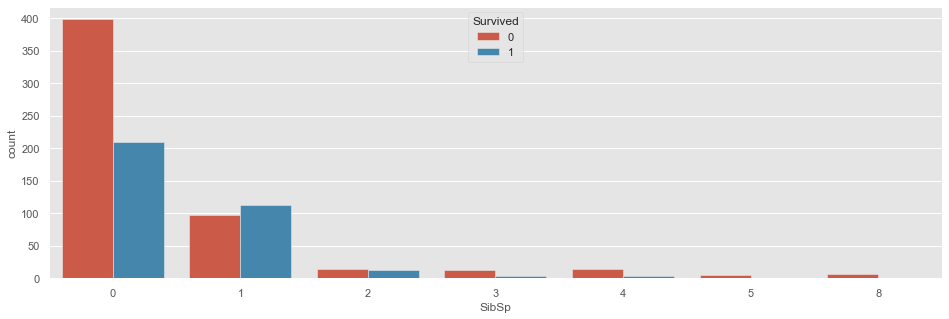

In [32]:
plt.figure(figsize = (16, 5))

sns.countplot(x = 'SibSp', data = train_df, hue = 'Survived')
plt.show()

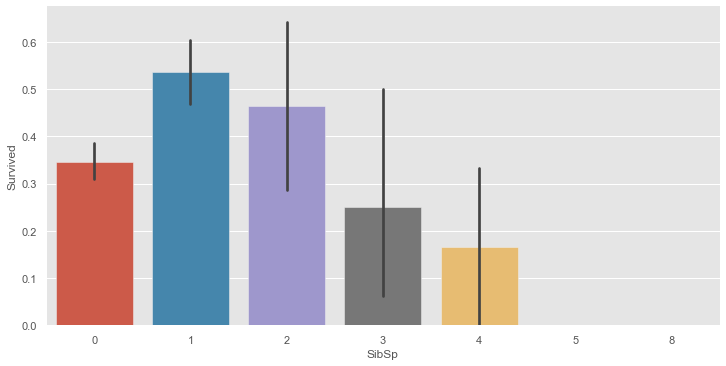

In [33]:
sns.catplot(x = 'SibSp', y = 'Survived', kind = 'bar', data = train_df, height = 5, aspect =2)
plt.show()

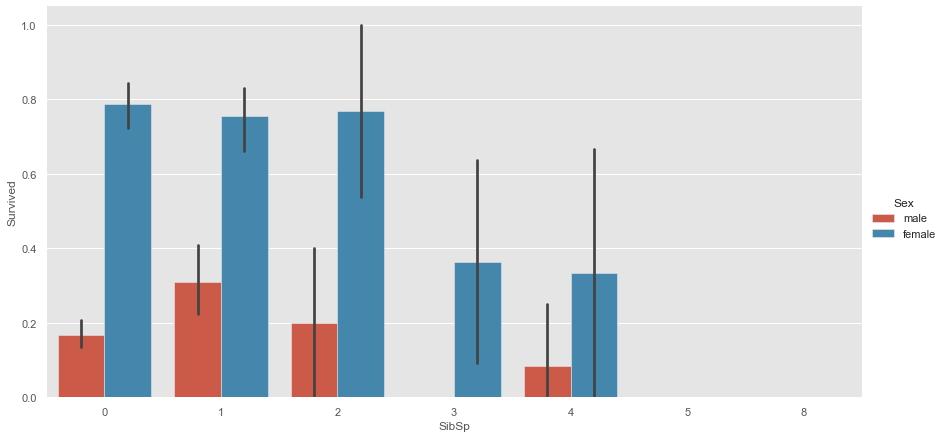

In [34]:
sns.catplot(x = 'SibSp', y = 'Survived', kind = 'bar', hue = 'Sex', data = train_df, height = 6, aspect = 2)
plt.show()

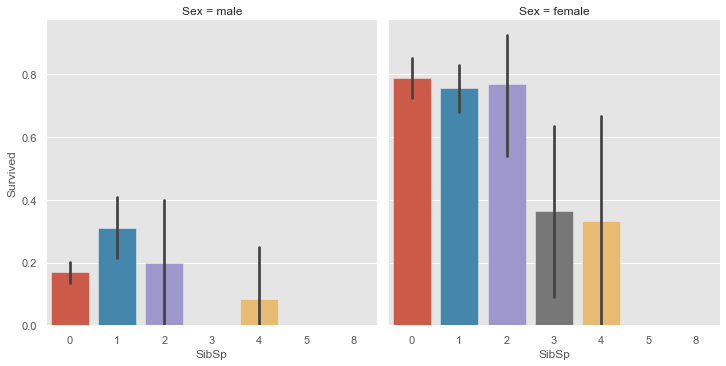

In [35]:
sns.catplot(x = 'SibSp',  y = 'Survived', kind = 'bar', col = 'Sex', data = train_df)
plt.show()

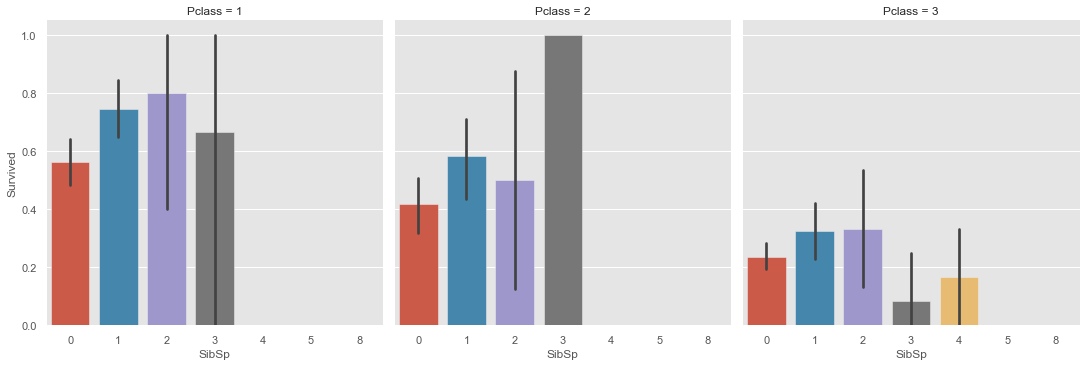

In [36]:
sns.catplot(x = 'SibSp', y = 'Survived', col = 'Pclass', kind = 'bar', data = train_df)
plt.show()

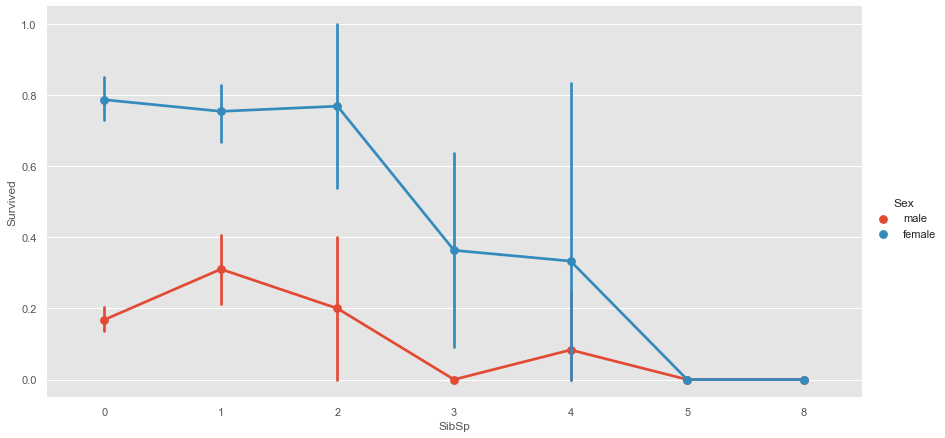

In [37]:
sns.catplot(x = 'SibSp', y = 'Survived', kind = 'point', hue = 'Sex', data = train_df, height = 6, aspect = 2)
plt.show()

#### Parch Columns

In [38]:
train_df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

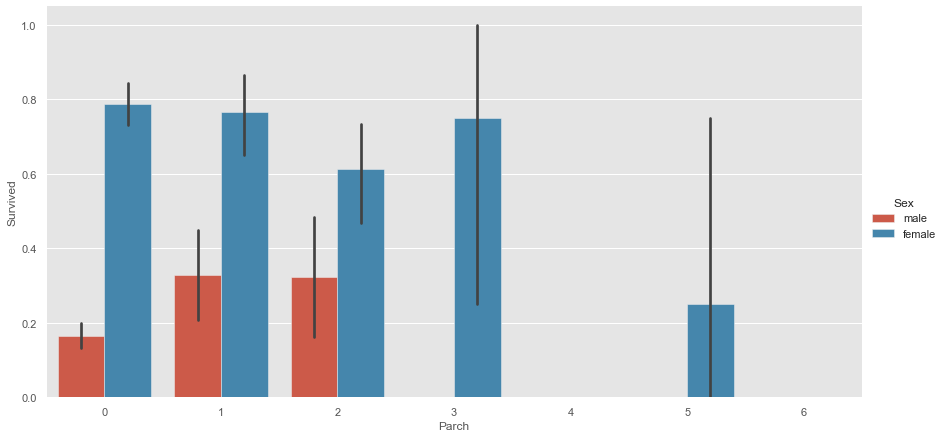

In [39]:
sns.catplot(x = 'Parch', y = 'Survived', data = train_df, hue = 'Sex', kind = 'bar', height = 6, aspect = 2)
plt.show()

#### Ticket Column

In [40]:
train_df.Ticket.value_counts()

1601        7
347082      7
CA. 2343    7
3101295     6
CA 2144     6
           ..
323951      1
349213      1
234604      1
364500      1
113767      1
Name: Ticket, Length: 681, dtype: int64

In [41]:
len(train_df.Ticket.unique())

681

#### Embarked Columns

In [42]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

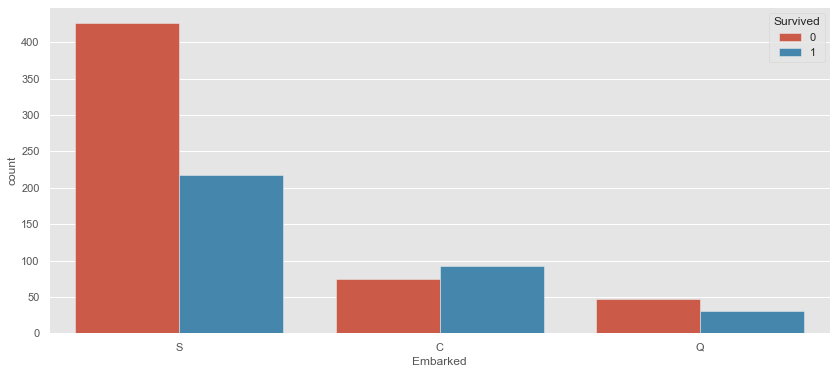

In [43]:
plt.figure(figsize = (14, 6))

sns.countplot('Embarked', hue = 'Survived', data = train_df)
plt.show()

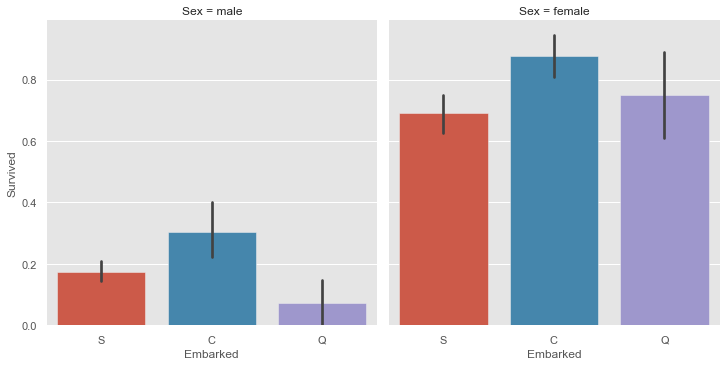

In [44]:
sns.catplot(x = 'Embarked', y = 'Survived', kind = 'bar', data = train_df, col = 'Sex')
plt.show()

#### Findings From EDA

* Females Survived more than Males.
* Passengers Travelling in Higher Class Survived More than Passengers travelling in Lower Class.
* Name column is having all unique values so this column is not suitable for prediction, we have to drop it.
* In First Class Females were more than Males, that's why Fare of Females Passengers were high.
* Survival Rate is higher for those who were travelling with siblings or spouses.
* Passengers travelling with parents or children have higher survival rate.
* Ticket column is not useful and does not have an impact on survival.
* Cabin column have a lot of null values , it will be better to drop this column.
* Passengers travelling from Cherbourg port survived more than passengers travelling from other two ports.

### Data Pre Processing

In [45]:
# dropping useless columns

train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [46]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [47]:
train_df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [48]:
# replacing Zero values of "Fare" column with mean of column

train_df['Fare'] = train_df['Fare'].replace(0, train_df['Fare'].mean())

In [49]:
# filling null values of "Age" column with mean value of the column

train_df['Age'].fillna(train_df['Age'].mean(), inplace = True)

In [50]:
# filling null values of "Embarked" column with mode value of the column

train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace = True)

In [51]:
# checking for null values after filling null values

train_df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [52]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [53]:
train_df['Sex'] = train_df['Sex'].apply(lambda val: 1 if val == 'male' else 0)

In [54]:
train_df['Embarked'] = train_df['Embarked'].map({'S' : 0, 'C': 1, 'Q': 2})

In [55]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


In [56]:
train_df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.746366,0.361392
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.514272,0.635673
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,4.012500,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.925000,0.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,15.100000,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,32.204208,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [57]:
train_df.var()

Survived       0.236772
Pclass         0.699015
Sex            0.228475
Age          169.052400
SibSp          1.216043
Parch          0.649728
Fare        2451.663181
Embarked       0.404081
dtype: float64

##### Variance in "Fare" column is very high so we have to normalize these columns.

In [58]:
train_df['Age'] = np.log(train_df['Age'])
train_df['Fare'] = np.log(train_df['Fare'])

In [59]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,3.091042,1,0,1.981001,0
1,1,1,0,3.637586,1,0,4.266662,1
2,1,3,0,3.258097,0,0,2.070022,0
3,1,1,0,3.555348,1,0,3.972177,0
4,0,3,1,3.555348,0,0,2.085672,0


##### Now training data looks much better let's take a look at test data.

In [60]:
test_df = pd.read_csv("titanic_train.csv")

In [61]:
test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Performing same steps on test data

In [62]:
# dropping useless columns

test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [63]:
# replacing Zero values of "Fare" column with mean of column

test_df['Fare'] = test_df['Fare'].replace(0, test_df['Fare'].mean())

In [64]:
# filling null values of "Age" column with mean value of the column

test_df['Age'].fillna(test_df['Age'].mean(), inplace = True)

In [65]:
# filling null values of "Embarked" column with mode value of the column

test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace = True)

In [66]:
test_df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [67]:
# filling null values of "Fare" column with mean value of the column

test_df['Fare'].fillna(test_df['Fare'].mean(), inplace = True)

In [68]:
test_df['Sex'] = test_df['Sex'].apply(lambda val: 1 if val == 'male' else 0)

In [69]:
test_df['Embarked'] = test_df['Embarked'].map({'S' : 0, 'C': 1, 'Q': 2})

In [70]:
test_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


In [71]:
test_df['Age'] = np.log(test_df['Age'])
test_df['Fare'] = np.log(test_df['Fare'])

In [72]:
test_df.var()

Survived    0.236772
Pclass      0.699015
Sex         0.228475
Age         0.499292
SibSp       1.216043
Parch       0.649728
Fare        0.866881
Embarked    0.404081
dtype: float64

In [73]:
test_df.isna().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [74]:
test_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,3.091042,1,0,1.981001,0
1,1,1,0,3.637586,1,0,4.266662,1
2,1,3,0,3.258097,0,0,2.070022,0
3,1,1,0,3.555348,1,0,3.972177,0
4,0,3,1,3.555348,0,0,2.085672,0


#### Now both training and test data is cleaned and preprocessed, let's start with model building

In [75]:
# creating X and y

X = train_df.drop('Survived', axis = 1)
y = train_df['Survived']

In [76]:
# splitting data intp training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

### Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [78]:
# accuracy score, confusion matrix and classification report of logistic regression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr_acc = accuracy_score(y_test, lr.predict(X_test))

print(f"Training Accuracy of Logistic Regression is {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Test Accuracy of Logistic Regression is {lr_acc}")

print(confusion_matrix(y_test, lr.predict(X_test)))
print(classification_report(y_test, lr.predict(X_test)))

Training Accuracy of Logistic Regression is 0.8105939004815409
Test Accuracy of Logistic Regression is 0.8134328358208955
[[145  23]
 [ 27  73]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       168
           1       0.76      0.73      0.74       100

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [79]:
# hyper parameter tuning of logistic regression

from sklearn.model_selection import GridSearchCV

grid_param = {
    'penalty': ['l1', 'l2'],
    'C' : [0.001, 0.01, 0.1, 0.005, 0.5, 1, 10]
}

grid_search_lr = GridSearchCV(lr, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_lr.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   21.1s finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.005, 0.5, 1, 10],
                         'penalty': ['l1', 'l2']},
             verbose=1)

In [80]:
# best parameters 

grid_search_lr.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [81]:
# best score 

grid_search_lr.best_score_

0.8138451612903227

In [82]:
lr = grid_search_lr.best_estimator_

In [83]:
# accuracy score, confusion matrix and classification report of logistic regression

lr_acc = accuracy_score(y_test, lr.predict(X_test))

print(f"Training Accuracy of Logistic Regression is {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Test Accuracy of Logistic Regression is {lr_acc}")

print(confusion_matrix(y_test, lr.predict(X_test)))
print(classification_report(y_test, lr.predict(X_test)))

Training Accuracy of Logistic Regression is 0.8105939004815409
Test Accuracy of Logistic Regression is 0.8171641791044776
[[149  19]
 [ 30  70]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       168
           1       0.79      0.70      0.74       100

    accuracy                           0.82       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.82      0.82      0.81       268



#### After hyper parameter tuning recall, f1-score and test-accuracy increases a bit.

### KNN

In [84]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [85]:
# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(classification_report(y_test, knn.predict(X_test)))

Training Accuracy of KNN is 0.8635634028892456
Test Accuracy of KNN is 0.7910447761194029 

[[140  28]
 [ 28  72]]

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       168
           1       0.72      0.72      0.72       100

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



### Decision Tree Classifier

In [86]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [87]:
# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(classification_report(y_test, dtc.predict(X_test)))

Training Accuracy of Decision Tree Classifier is 0.9791332263242376
Test Accuracy of Decision Tree Classifier is 0.7798507462686567 

[[139  29]
 [ 30  70]]

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       168
           1       0.71      0.70      0.70       100

    accuracy                           0.78       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.78      0.78      0.78       268



In [88]:
# hyper parameter tuning of decision tree 

grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 1288 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 3288 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed:   42.3s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [89]:
# best parameters

grid_search_dtc.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'splitter': 'best'}

In [90]:
# best score

grid_search_dtc.best_score_

0.8218451612903225

In [91]:
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7, max_features = 'log2', min_samples_leaf = 3,
                             min_samples_split = 3, splitter = 'best')
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features='log2',
                       min_samples_leaf=3, min_samples_split=3)

In [92]:
# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(classification_report(y_test, dtc.predict(X_test)))

Training Accuracy of Decision Tree Classifier is 0.7881219903691814
Test Accuracy of Decision Tree Classifier is 0.7276119402985075 

[[136  32]
 [ 41  59]]

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       168
           1       0.65      0.59      0.62       100

    accuracy                           0.73       268
   macro avg       0.71      0.70      0.70       268
weighted avg       0.72      0.73      0.72       268



#### Random Forest Classifier

In [93]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

RandomForestClassifier()

In [94]:
# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {rd_clf_acc} \n")

print(f"{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(classification_report(y_test, rd_clf.predict(X_test)))

Training Accuracy of Decision Tree Classifier is 0.9791332263242376
Test Accuracy of Decision Tree Classifier is 0.8208955223880597 

[[147  21]
 [ 27  73]]

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       168
           1       0.78      0.73      0.75       100

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



#### Ada Boost Classifier

In [95]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=7,
                                                         max_features='log2',
                                                         min_samples_leaf=3,
                                                         min_samples_split=3))

In [96]:
# accuracy score, confusion matrix and classification report of ada boost

ada_acc = accuracy_score(y_test, ada.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, ada.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {ada_acc} \n")

print(f"{confusion_matrix(y_test, ada.predict(X_test))}\n")
print(classification_report(y_test, ada.predict(X_test)))

Training Accuracy of Decision Tree Classifier is 0.9791332263242376
Test Accuracy of Decision Tree Classifier is 0.7910447761194029 

[[139  29]
 [ 27  73]]

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       168
           1       0.72      0.73      0.72       100

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



In [97]:
# hyper parameter tuning ada boost

grid_param = {
    'n_estimators' : [100, 120, 150, 180, 200],
    'learning_rate' : [0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search_ada = GridSearchCV(ada, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_ada.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   46.9s finished


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                max_depth=7,
                                                                                max_features='log2',
                                                                                min_samples_leaf=3,
                                                                                min_samples_split=3)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.1, 1, 10],
                         'n_estimators': [100, 120, 150, 180, 200]},
             verbose=1)

In [98]:
# best parameter

grid_search_ada.best_params_

{'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 100}

In [99]:
# best score

grid_search_ada.best_score_

0.8250967741935484

In [100]:
ada = AdaBoostClassifier(base_estimator = dtc, algorithm = 'SAMME', learning_rate = 0.01, n_estimators = 200)
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=7,
                                                         max_features='log2',
                                                         min_samples_leaf=3,
                                                         min_samples_split=3),
                   learning_rate=0.01, n_estimators=200)

In [101]:
# accuracy score, confusion matrix and classification report of ada boost

ada_acc = accuracy_score(y_test, ada.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, ada.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {ada_acc} \n")

print(f"{confusion_matrix(y_test, ada.predict(X_test))}\n")
print(classification_report(y_test, ada.predict(X_test)))

Training Accuracy of Decision Tree Classifier is 0.8780096308186196
Test Accuracy of Decision Tree Classifier is 0.8208955223880597 

[[150  18]
 [ 30  70]]

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       168
           1       0.80      0.70      0.74       100

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268



#### Gradient Boosting Classifier

In [102]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [103]:
# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {gb_acc} \n")
print(f"{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(classification_report(y_test, gb.predict(X_test)))

Training Accuracy of Decision Tree Classifier is 0.9085072231139647
Test Accuracy of Decision Tree Classifier is 0.8432835820895522 

[[153  15]
 [ 27  73]]

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       168
           1       0.83      0.73      0.78       100

    accuracy                           0.84       268
   macro avg       0.84      0.82      0.83       268
weighted avg       0.84      0.84      0.84       268



#### Stochastic Gradient Boosting (SGB)

In [104]:
sgb = GradientBoostingClassifier(subsample = 0.90, max_features = 0.70)
sgb.fit(X_train, y_train)

GradientBoostingClassifier(max_features=0.7, subsample=0.9)

In [105]:
# accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier

sgb_acc = accuracy_score(y_test, sgb.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, sgb.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {sgb_acc} \n")

print(f"{confusion_matrix(y_test, sgb.predict(X_test))}\n")
print(classification_report(y_test, sgb.predict(X_test)))

Training Accuracy of Decision Tree Classifier is 0.9069020866773676
Test Accuracy of Decision Tree Classifier is 0.8470149253731343 

[[153  15]
 [ 26  74]]

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       168
           1       0.83      0.74      0.78       100

    accuracy                           0.85       268
   macro avg       0.84      0.83      0.83       268
weighted avg       0.85      0.85      0.84       268



In [106]:
#installing Xgboost
#pip install xgboost requests pandas

#### XgBoost

In [107]:
from xgboost import XGBClassifier

xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(X_train, y_train)

[01:40:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=180, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [108]:
# accuracy score, confusion matrix and classification report of xgboost

xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {xgb_acc} \n")

print(f"{confusion_matrix(y_test, xgb.predict(X_test))}\n")
print(classification_report(y_test, xgb.predict(X_test)))


Training Accuracy of Decision Tree Classifier is 0.9454253611556982
Test Accuracy of Decision Tree Classifier is 0.8246268656716418 

[[147  21]
 [ 26  74]]

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       168
           1       0.78      0.74      0.76       100

    accuracy                           0.82       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



In [109]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'Stochastic Gradient Boosting', 'XgBoost'],
    'Score' : [lr_acc, knn_acc, dtc_acc, rd_clf_acc, ada_acc, gb_acc, sgb_acc, xgb_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
6,Stochastic Gradient Boosting,0.847015
5,Gradient Boosting Classifier,0.843284
7,XgBoost,0.824627
3,Random Forest Classifier,0.820896
4,Ada Boost Classifier,0.820896
0,Logistic Regression,0.817164
1,KNN,0.791045
2,Decision Tree Classifier,0.727612


##### Gradient Boosting classifier gives best result so we use Gradient Boosting Classifier for predictions.

# Model Saving 

In [110]:
# saving Stochastic Gradient Boosting (SGB) model

import pickle
filename = 'Titanic_file.pkl'
pickle.dump(sgb, open(filename, 'wb'))

# Conclusion:

In [111]:
import numpy as np
a= np.array(y_test)
predicted=np.array(sgb.predict(X_test))
df_conc=pd.DataFrame({"Original":a, "Predicted":predicted}, index= range(len(a)))
df_conc

,Original,Predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
263,0,0
264,0,0
265,0,0
266,1,1
